### Import and Cleaning of Data

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn

**Column** | **Content**
---|---
Age | Maternal Age
BMI | Body mass index (weight([kg]/height[m]^2)
Nmisc | Number of previous miscarriages
Binking = Biking | Biking
Walking | Walking
Drinving = Driving | Drinving
Sitting | Sitting
Location | Location
temp | Body Temperature
bpm| Heart Rate [bpm]
stress | Stress motion
bp | Blood Pressure
Alcohol consumption | Level of Alcohol Consumption
Drunk | State of the Drunk Level
Miscarriage/ No Miscarriage  | Age of person

In [80]:
df = pd.read_csv('data/Miscarriage_Prediction_dataset_New_HA.csv',delimiter=';')

### Basic Characteritics of the DataSet

In [81]:
df.shape

(1000000, 16)

In [8]:
df.head()

,Age,BMI,Nmisc,Activity,Binking,Walking,Drinving,Sitting,Location,temp,bpm,stress,bp,Alcohol Comsumption,Drunk,Miscarriage/ No Miscarriage
0,22,"16,68823896",0,1,0,0,1,1,2,38,103,0,2,449,0,0
1,22,"16,68823896",0,1,0,0,1,1,1,36,103,0,2,276,2,0
2,22,"16,68823896",2,1,0,0,1,1,3,38,103,0,2,534,2,0
3,22,"16,68823896",0,1,0,1,0,1,2,39,102,1,2,230,2,0
4,22,"16,68823896",1,1,0,1,0,1,3,35,102,1,2,364,2,0


In [10]:
df.describe()

,Age,Nmisc,Activity,Binking,Walking,Drinving,Sitting,Location,temp,bpm,stress,bp,Alcohol Comsumption,Drunk,Miscarriage/ No Miscarriage
count,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,28.002910,1.500901,1.0,0.499314,0.498280,0.002406,0.500419,2.001708,37.783945,128.908990,1.198880,1.524510,477.611137,1.888403,0.499429
std,3.742043,1.117784,0.0,0.500000,0.499997,0.048992,0.500000,1.413462,1.819482,57.715193,1.141643,1.114693,218.378587,0.421518,0.500000
min,22.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,43.000000,0.000000,0.000000,100.000000,0.000000,0.000000
25%,25.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,36.000000,78.000000,0.000000,0.000000,288.000000,2.000000,0.000000
50%,28.000000,2.000000,1.0,0.000000,0.000000,0.000000,1.000000,2.000000,38.000000,119.000000,1.000000,2.000000,478.000000,2.000000,0.000000
75%,31.000000,3.000000,1.0,1.000000,1.000000,0.000000,1.000000,3.000000,39.000000,167.000000,2.000000,2.000000,667.000000,2.000000,1.000000
max,34.000000,3.000000,1.0,1.000000,1.000000,1.000000,1.000000,4.000000,41.000000,238.000000,3.000000,3.000000,855.000000,2.000000,1.000000


### Overview about Missing Values

<Axes: >

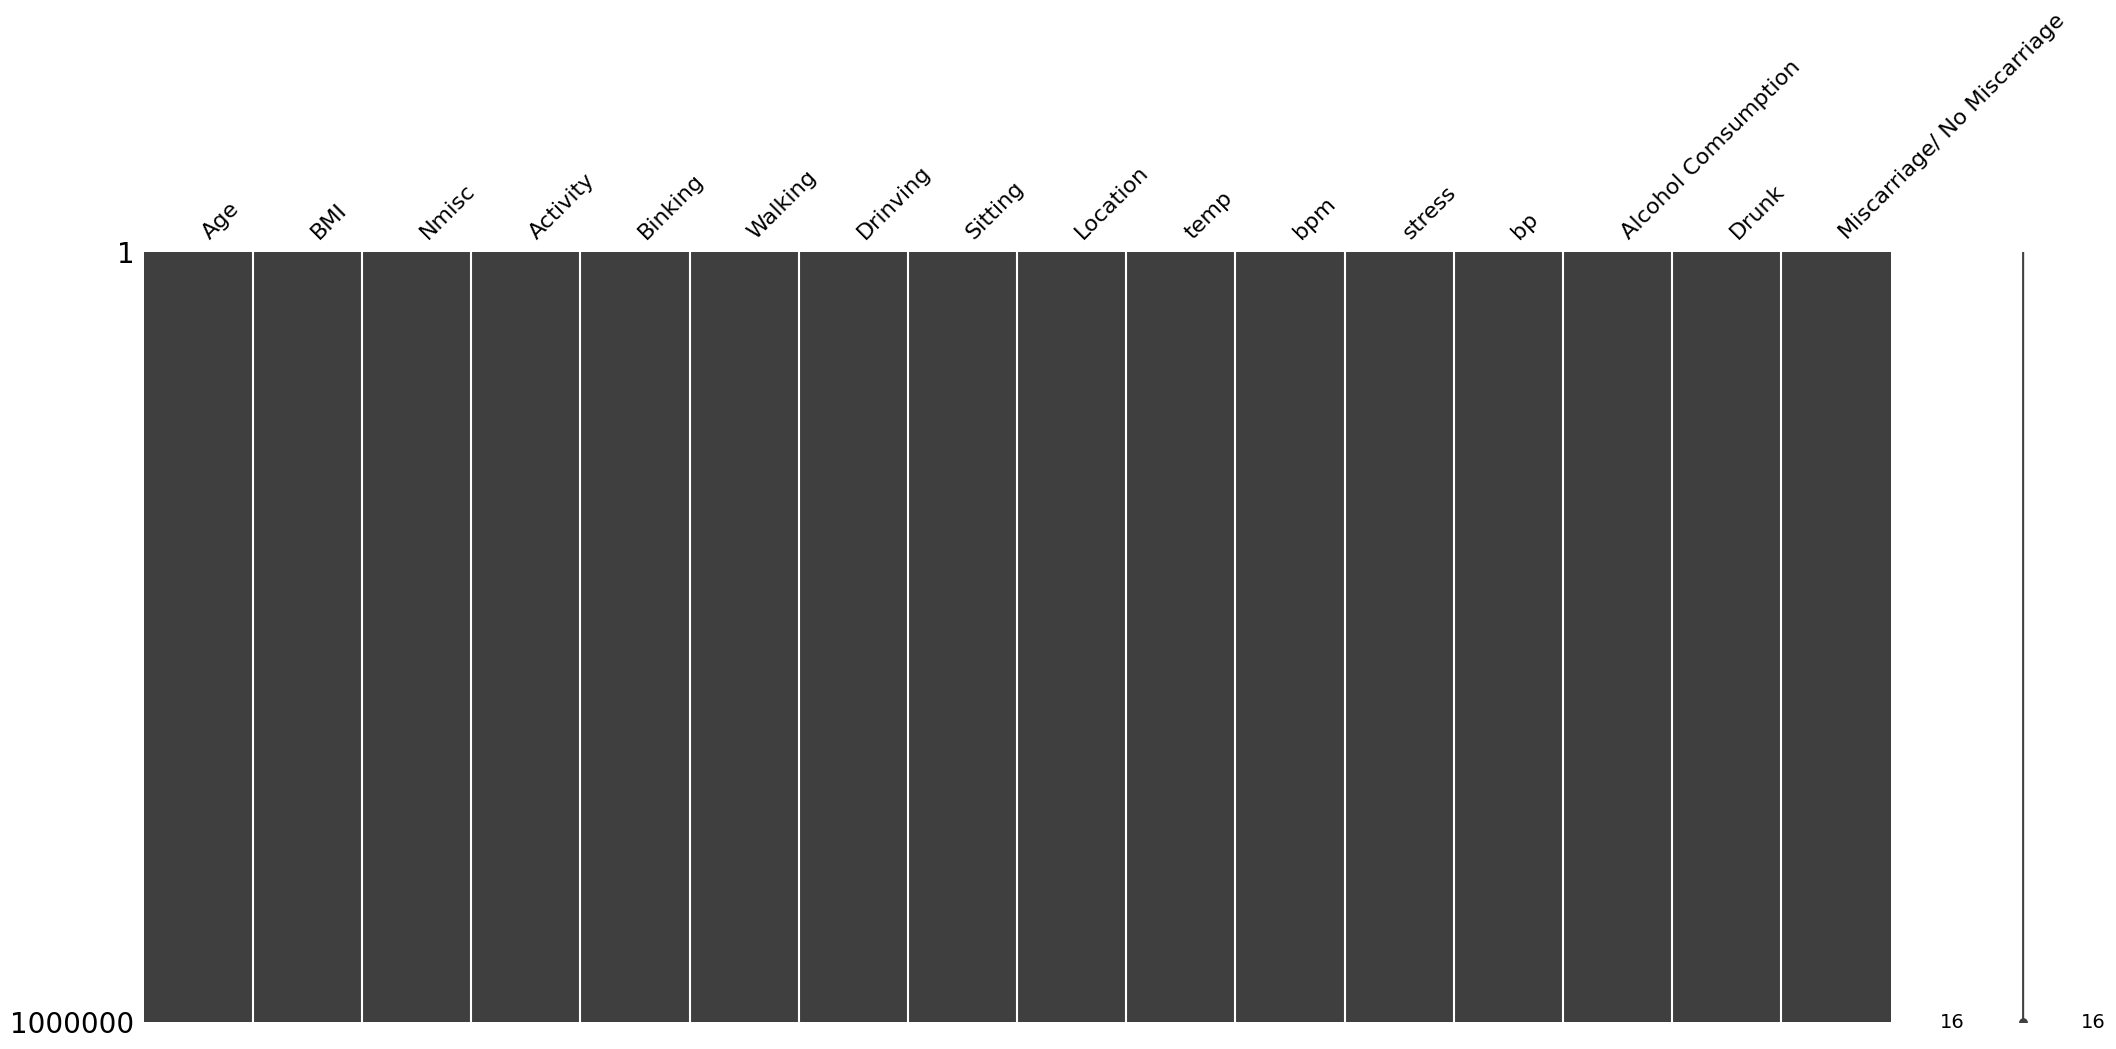

In [17]:
msn.matrix(df)

In [18]:
df.isnull().sum()

Age                            0
BMI                            0
Nmisc                          0
Activity                       0
Binking                        0
Walking                        0
Drinving                       0
Sitting                        0
Location                       0
temp                           0
bpm                            0
stress                         0
bp                             0
Alcohol Comsumption            0
Drunk                          0
Miscarriage/ No Miscarriage    0
dtype: int64

there are no missing values present in the dataframe.

In [88]:
df.columns

Index(['Age', 'BMI', 'Nmisc', 'Activity', 'Biking', 'Walking', 'Driving',
       'Sitting', 'Location', 'temp', 'bpm', 'stress', 'bp',
       'Alcohol_Comsumption', 'Drunk', 'Miscarriage'],
      dtype='object')

modify column names to remove typos and. spaces

In [87]:
df.columns = ['Age', 'BMI', 'Nmisc', 'Activity', 'Biking', 'Walking', 'Driving',
       'Sitting', 'Location', 'temp', 'bpm', 'stress', 'bp',
       'Alcohol_Comsumption', 'Drunk', 'Miscarriage']

The column 'Activity' contains only ones for all observations, thus I remove it.


In [89]:
df = df.drop('Activity', axis =1)

The colum 'BMI' uses a ',' as delimiter for the float. I change it to a '.' and convert the datatype for the column to 'float'

In [110]:
bmi = []
for instance in df['BMI']:
    bmi.append(float(instance.replace(',', '.')))
df['BMI'] = bmi

#df['BMI'].astype('float')

In [111]:
df.dtypes

Age                       int64
BMI                     float64
Nmisc                     int64
Biking                 category
Walking                category
Driving                category
Sitting                category
Location               category
temp                      int64
bpm                       int64
stress                 category
bp                     category
Alcohol_Comsumption       int64
Drunk                  category
Miscarriage            category
dtype: object

In [95]:
df.nunique()


Age                     13
BMI                     24
Nmisc                    4
Biking                   2
Walking                  2
Driving                  2
Sitting                  2
Location                 5
temp                     7
bpm                     51
stress                   4
bp                       4
Alcohol_Comsumption    756
Drunk                    3
Miscarriage              2
dtype: int64

summarize categorical and numerical features.

In [96]:
cat_features = ['Biking', 'Walking', 'Driving', 'Sitting', 'Location', 'stress', 'bp', 'Drunk', 'Miscarriage']
num_features = ['Age', 'BMI', 'Nmisc','temp', 'bpm', 'Alcohol_Consumption']

change dataype in columns with categorical features.

In [109]:
df['BMI'][0]

'16.68823896'

In [107]:
for col in cat_features:
    df[col] = df[col].astype('category')

0         16.688239
1         16.688239
2         16.688239
3         16.688239
4         16.688239
            ...    
999995    26.530021
999996    26.530021
999997    26.530021
999998    26.530021
999999    26.530021
Name: BMI, Length: 1000000, dtype: float64

### Distribution of target

<Axes: ylabel='count'>

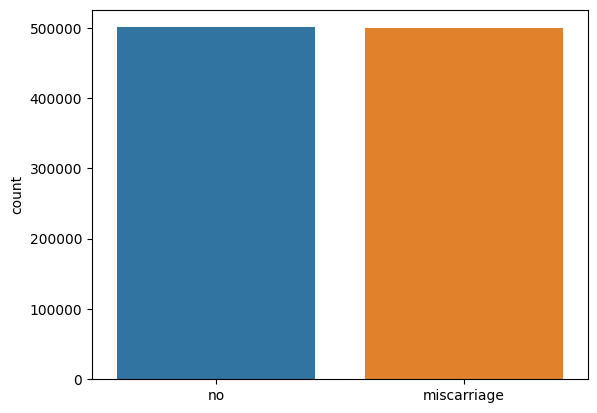

In [61]:
sns.barplot(x= ['no', 'miscarriage'], y=df['Miscarriage/ No Miscarriage'].value_counts())

The dataset is balanced with respect to the target variable

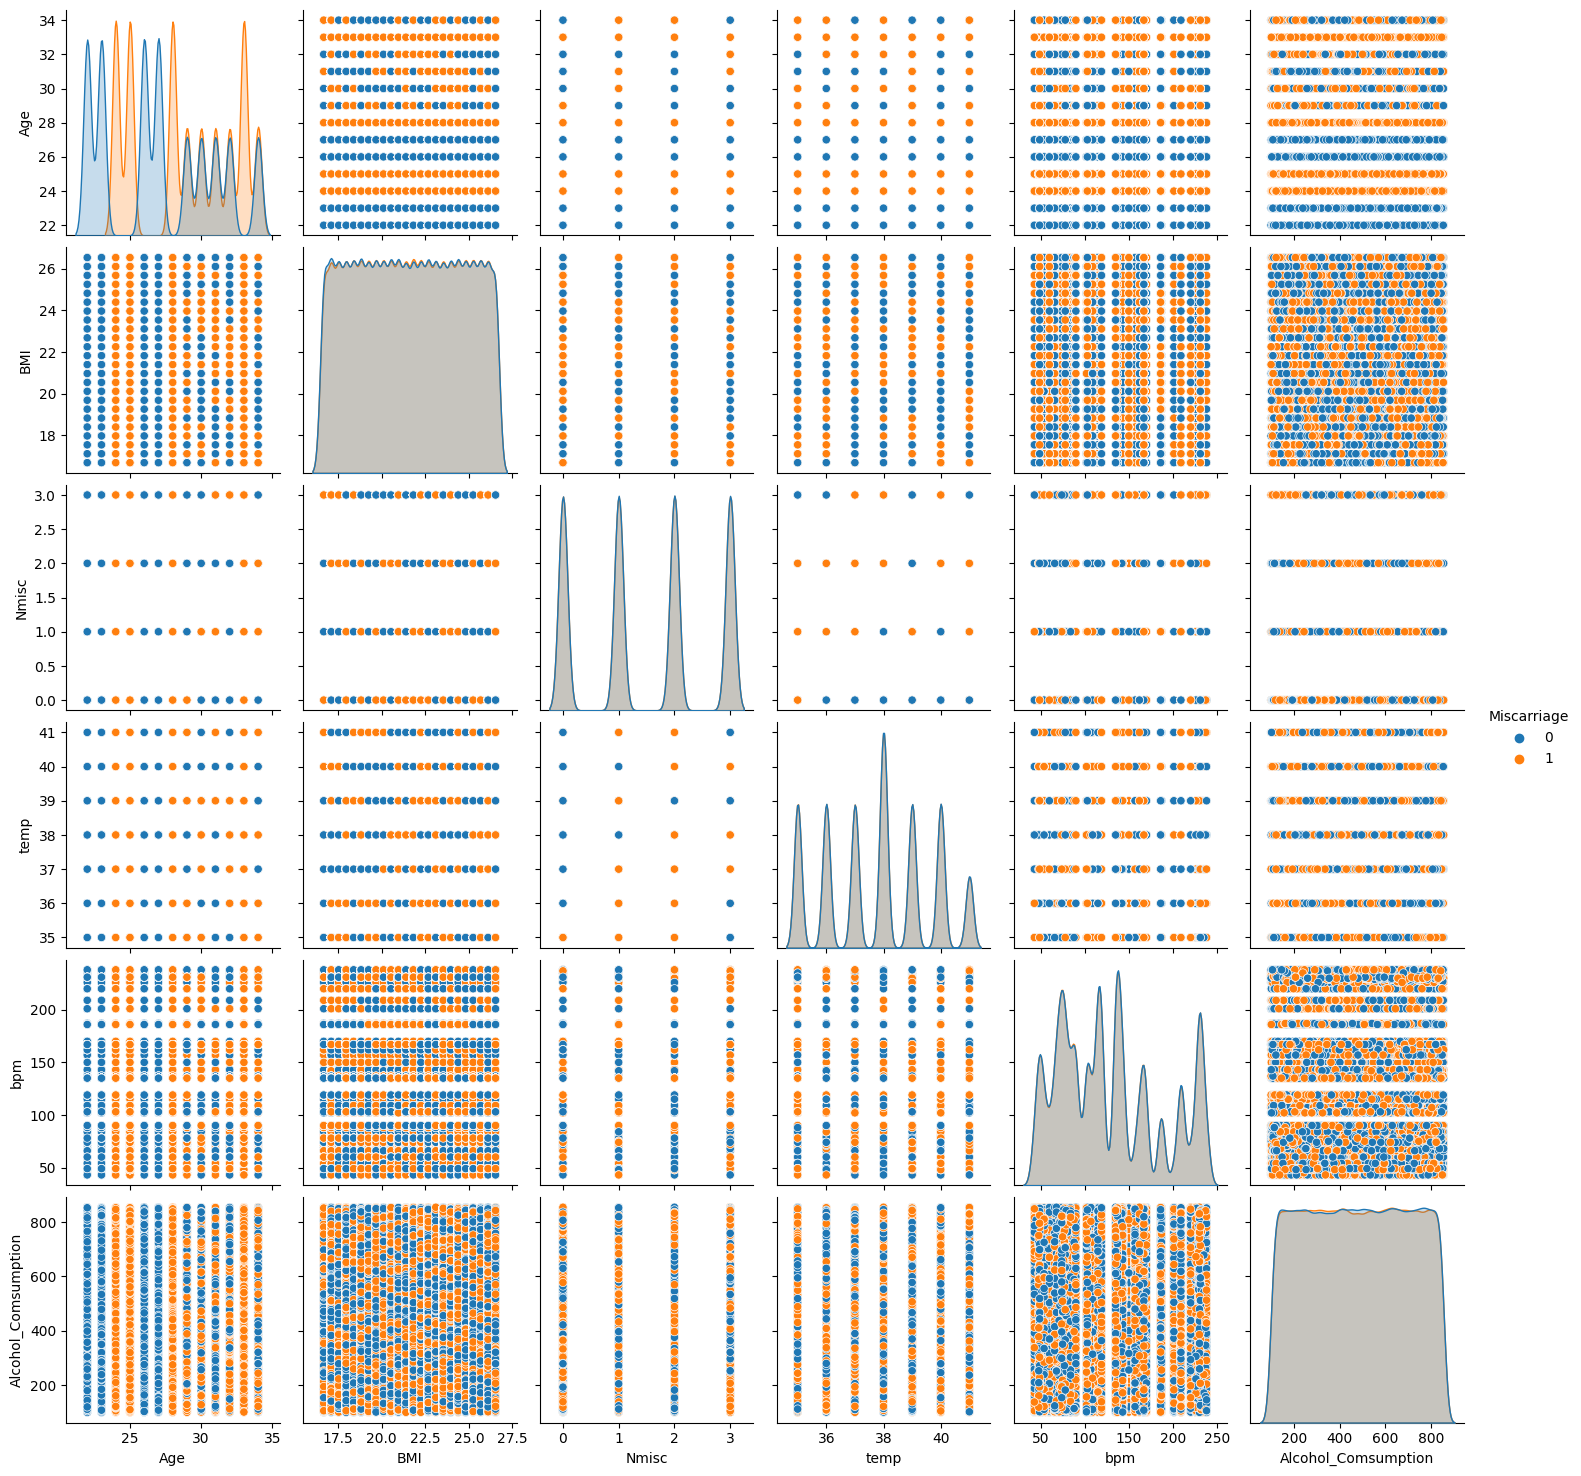

In [116]:
sns.pairplot(df, hue = 'Miscarriage')

In [125]:
df = df.drop('Age', axis = 1)

There is a pattern is the age feature. Thus, I need to remove that feature from the feature list to prevent future models to predict only on that feature.

In [113]:
df.corr()

,Age,BMI,Nmisc,Biking,Walking,Driving,Sitting,Location,temp,bpm,stress,bp,Alcohol_Comsumption,Drunk,Miscarriage
Age,1.000000,0.001696,0.000577,0.000662,-0.000714,0.000535,-0.000965,0.000468,0.002535,0.000937,-0.001125,0.000603,-0.000785,-0.000788,0.247124
BMI,0.001696,1.000000,0.000067,0.000688,-0.000618,-0.000719,-0.000291,0.000899,0.000857,-0.001798,0.000188,-0.001877,0.001006,0.001047,0.002023
Nmisc,0.000577,0.000067,1.000000,0.001204,-0.000966,-0.002432,0.000901,0.000059,-0.001759,0.000827,0.001026,0.000738,0.001141,-0.000893,-0.000255
Biking,0.000662,0.000688,0.001204,1.000000,-0.995200,-0.049043,-0.001497,0.002724,0.000902,0.001306,0.001420,-0.000566,-0.000311,0.000863,-0.000864
Walking,-0.000714,-0.000618,-0.000966,-0.995200,1.000000,-0.048941,0.001525,-0.002779,-0.001065,0.001077,0.000300,0.000781,0.000366,-0.000714,0.000610
Driving,0.000535,-0.000719,-0.002432,-0.049043,-0.048941,1.000000,-0.000286,0.000562,0.001670,-0.024318,-0.017548,-0.002197,-0.000558,-0.001525,0.002587
Sitting,-0.000965,-0.000291,0.000901,-0.001497,0.001525,-0.000286,1.000000,-0.000772,-0.000003,0.001090,-0.001434,0.002015,0.000500,-0.000155,-0.000015
Location,0.000468,0.000899,0.000059,0.002724,-0.002779,0.000562,-0.000772,1.000000,-0.000217,-0.000351,-0.000504,-0.001238,0.001310,0.000340,0.000184
temp,0.002535,0.000857,-0.001759,0.000902,-0.001065,0.001670,-0.000003,-0.000217,1.000000,0.002047,0.000197,0.001440,0.000339,0.000128,-0.001092
bpm,0.000937,-0.001798,0.000827,0.001306,0.001077,-0.024318,0.001090,-0.000351,0.002047,1.000000,0.228903,0.902647,-0.001081,0.000595,-0.000342


<Axes: >

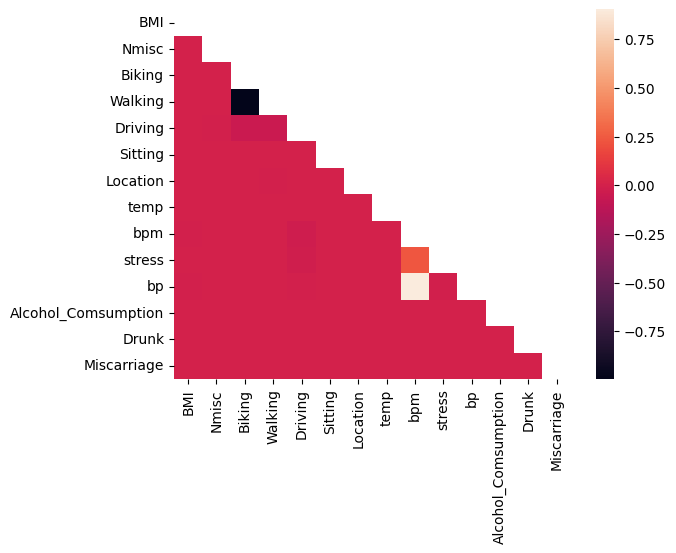

In [126]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask)

To figure out, if I need to remove one of the activity features (Biking, Driving, Sitting, Walking) to prevent from redundancy, I analyze whether those columns sum up to one for every observation.

In [131]:
(df['Biking'].astype(int)+df['Driving'].astype(int)+df['Sitting'].astype(int)+df['Walking'].astype(int)).unique()

array([2, 1])

All columns could  / should be kept.

In [132]:
df.to_csv('data/cleaned_data.csv')

In [135]:
df = df.drop_duplicates()

In [136]:
df.shape

(999375, 14)